# Azatuhi Khachatryan

#  Homework 4

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

import quandl 
from pandas_datareader import data 

from plotly.offline import iplot
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go
init_notebook_mode(connected=True) 


> 1. Read Salary dataset, sheet "salary"

In [2]:
salary = pd.read_csv("salary.csv")

In [3]:
salary.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,Geder,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,NaN,Widowed,NaN,Not-in-family,White,Female,NaN,4356.0,40.0,United-States,<=50K
1,82,Private,132870,HS-grad,NaN,Widowed,Exec-managerial,Not-in-family,White,Female,NaN,4356.0,18.0,United-States,<=50K
2,66,?,186061,Some-college,10.0,Widowed,NaN,Unmarried,Black,Female,NaN,4356.0,40.0,United-States,<=50K
3,54,Private,140359,7th-8th,NaN,Divorced,Machine-op-inspct,Unmarried,White,Female,NaN,3900.0,40.0,United-States,<=50K
4,41,Private,264663,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,NaN,3900.0,40.0,United-States,<=50K


> 2. How many rows and how many columns the dataset has?

In [4]:
salary.shape

(32561, 15)

 **32561 rows and 15 columns**

> 3. How many missing values does each variable contain?

In [5]:
salary.isnull().sum()

age                   0
workclass             0
fnlwgt                0
education             0
education.num     14754
marital.status        0
occupation         1843
relationship          0
race                  0
Geder                 0
capital.gain      29849
capital.loss      31042
hours.per.week      458
native.country      583
income                0
dtype: int64

In [6]:
#there are columns/variables that have no missing values

### **4. Handling missing values:**
> a. If you have noticed column “workclass” contains lots of ‘?’ signs
instead of blank values. Replace all ‘?’ with NA values.


In [7]:
salary.workclass.replace("?", "NA")

0             NA
1        Private
2             NA
3        Private
4        Private
          ...   
32556    Private
32557    Private
32558    Private
32559    Private
32560    Private
Name: workclass, Length: 32561, dtype: object

> b. Drop the columns which have more than 1700 missing values.

In [8]:
salary.isnull().sum()

age                   0
workclass             0
fnlwgt                0
education             0
education.num     14754
marital.status        0
occupation         1843
relationship          0
race                  0
Geder                 0
capital.gain      29849
capital.loss      31042
hours.per.week      458
native.country      583
income                0
dtype: int64

In [9]:
new_salary = salary.drop(columns = ["education.num", "occupation", "capital.gain", "capital.loss"], axis = 1, inplace = False)

In [10]:
new_salary

,age,workclass,fnlwgt,education,marital.status,relationship,race,Geder,hours.per.week,native.country,income
0,90,?,77053,HS-grad,Widowed,Not-in-family,White,Female,40.0,United-States,<=50K
1,82,Private,132870,HS-grad,Widowed,Not-in-family,White,Female,18.0,United-States,<=50K
2,66,?,186061,Some-college,Widowed,Unmarried,Black,Female,40.0,United-States,<=50K
3,54,Private,140359,7th-8th,Divorced,Unmarried,White,Female,40.0,United-States,<=50K
4,41,Private,264663,Some-college,Separated,Own-child,White,Female,40.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,Never-married,Not-in-family,White,Male,40.0,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,Married-civ-spouse,Wife,White,Female,38.0,United-States,<=50K
32558,40,Private,154374,HS-grad,Married-civ-spouse,Husband,White,Male,40.0,United-States,>50K
32559,58,Private,151910,HS-grad,Widowed,Unmarried,White,Female,40.0,United-States,<=50K


In [11]:
#We dropped the columns that have more than 1700 missing values, 
#now let's chack the numbers of missing values in new_salary to see if we did it right
new_salary.isna().sum()


age                 0
workclass           0
fnlwgt              0
education           0
marital.status      0
relationship        0
race                0
Geder               0
hours.per.week    458
native.country    583
income              0
dtype: int64

In [12]:
#now our copied dataset contains only the columns that have less than 1700 missing values

In [13]:
new_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   marital.status  32561 non-null  object 
 5   relationship    32561 non-null  object 
 6   race            32561 non-null  object 
 7   Geder           32561 non-null  object 
 8   hours.per.week  32103 non-null  float64
 9   native.country  31978 non-null  object 
 10  income          32561 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.7+ MB


In [14]:
# We can see now that all the columns contain the same amount of values except native.country and hours.per.week 
# because these two are the only columns that have empty cells less than 1700

> c. Drop all rows that have at least one missing value. Do task a) first
then task b), the order is important

In [15]:
new_salary.dropna(axis = 0, inplace=True)

In [16]:
new_salary.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital.status    0
relationship      0
race              0
Geder             0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [17]:
#as we have dropped the rows with missing values there are no missing values in any of the columns in dataset

> d. What is the shape of the data after dropping missing values?

In [18]:
#If we compare the number of rows and columns with the original salary data, 
#we can notice that both are less now
new_salary.shape

(31527, 11)

> 5. In some of the column headings, there are ‘.’ sign (e.g. marital.status),
replace ‘.’ sign with ‘_’ underscore sign.

In [75]:
new_salary.columns = new_salary.columns.str.replace(".","_")


<ipython-input-75-7382d86cde2e>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [76]:
#let's check the column titles to what we have changed
new_salary.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital_status',
       'relationship', 'race', 'Geder', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

> 6.Check correlation between “age”, “fnlwgt”, “hours per week” columns. In
absolute value, which variables have the highest correlation?

In [77]:
relation = new_salary[["age", "fnlwgt", "hours_per_week"]].corr().round(2)

In [78]:
relation

,age,fnlwgt,hours_per_week
age,1.00,-0.08,0.10
fnlwgt,-0.08,1.00,-0.02
hours_per_week,0.10,-0.02,1.00


In [24]:
#here we caan see that “age” and “hours per week” variables have the highest correlation, which is 0.1

> 6a. Visualize table of correlations created above through heatmap from
seaborn library.

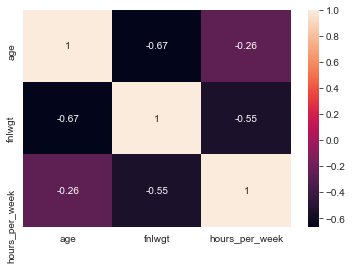

In [79]:
sns.heatmap(relation.corr().round(2),
            annot=True 
           )

plt.show()

> 7. Calculate the following measures: average age, median age, min age, max
age, st. dev of age.

In [26]:
import statistics as stats

In [80]:
print('Average Age: ', new_salary.age.mean())
print('Median Age: ', new_salary.age.median())
print('min age: ', min(new_salary.age))
print('max age: ', max(new_salary.age))
print('Standard deviation of age: ', stats.stdev(new_salary.age))

Average Age:  38.45196181051163
Median Age:  37.0
min age:  17
max age:  90
Standard deviation of age:  13.45700340674027


>  8. Visualize relationships below by using either matplotlib.pyplot OR seaborn
modules. This script here might be helpful if you are not sure what types of charts to
choose. You are free to use other types of charts as well. You should use at least two
different types of charts.

>>a. Relationship between “Income” and “Age”,


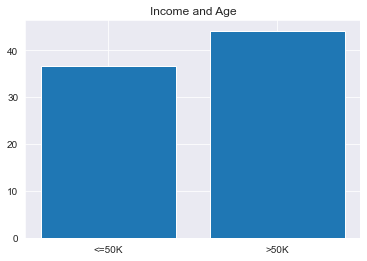

In [81]:
sns.set_style('darkgrid')
plt.bar(new_salary.income.unique(), new_salary.groupby('income')['age'].mean())

plt.title("Income and Age")
plt.show()

>>b. Relationship between “Income” and “Gender”,

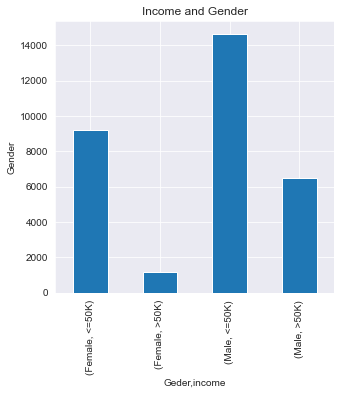

In [109]:
plt.figure(figsize=(5,5))

plt.title("Income and Gender")
plt.xlabel("Income")
plt.ylabel("Gender")
new_salary.groupby(["Geder"])["income"].value_counts().plot(kind="bar")
plt.show()




>>c. Relationship between “Income” and “Race”,

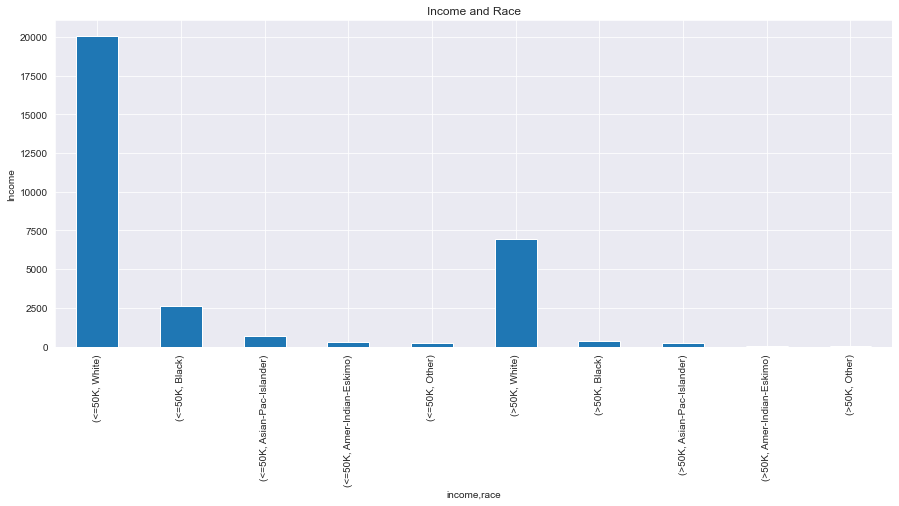

In [101]:
plt.figure(figsize=(15,6))

plt.title("Income and Race")
plt.xlabel("Race")
plt.ylabel("Income")
new_salary.groupby(["income"])["race"].value_counts().plot(kind="bar")
plt.show()

>>d. Relationship between “Age” and “hours per week”

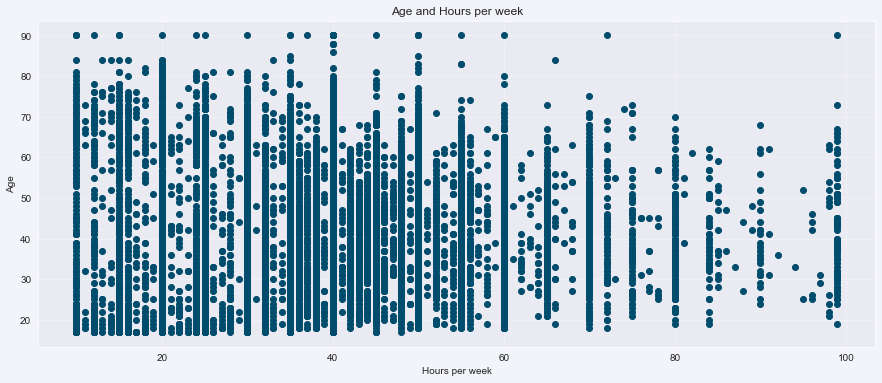

In [107]:
plt.figure(figsize=(15,6), facecolor="#f2f4f9") 
plt.scatter(new_salary["hours_per_week"],
            new_salary.age,
            color="#004c6d")
plt.title("Age and Hours per week")
plt.xlabel("Hours per week")
plt.ylabel("Age")
plt.grid(b=True,
         linestyle=':')
plt.show()

>>e. Relationship between “hours per week” and “Income”

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



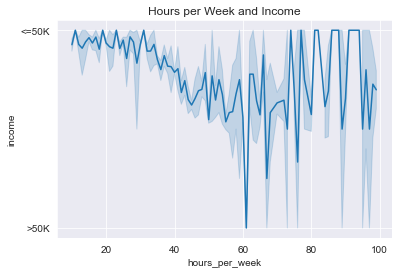

In [108]:
sns.lineplot(new_salary.hours_per_week, new_salary.income)
plt.title("Hours per Week and Income")
plt.show()

 >9. Use for loop to visualize distribution of all numeric variables in the dataset.

In [33]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education_num   17807 non-null  float64
 5   marital_status  32561 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   Geder           32561 non-null  object 
 10  capital_gain    2712 non-null   float64
 11  capital_loss    1519 non-null   float64
 12  hours_per_week  32103 non-null  float64
 13  native_country  31978 non-null  object 
 14  income          32561 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 3.7+ MB


In [34]:
salary_num = salary.select_dtypes(exclude = "object")

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



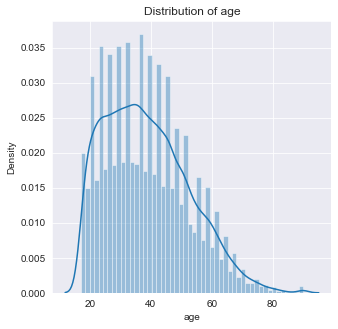

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



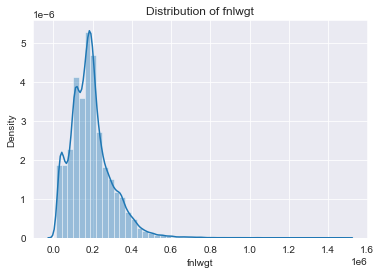

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



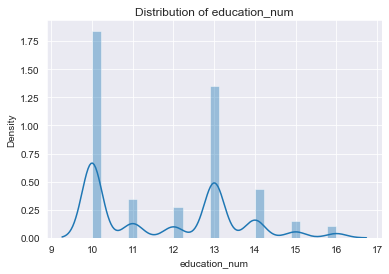

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



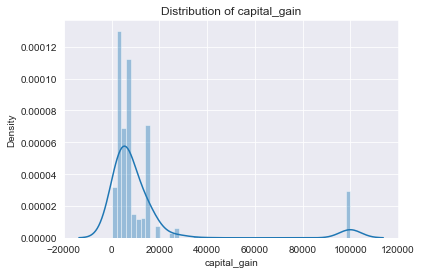

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



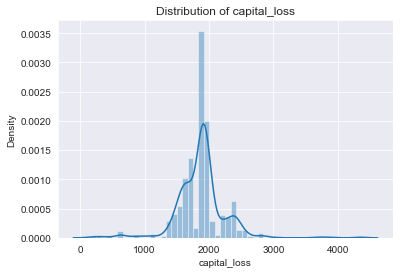

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



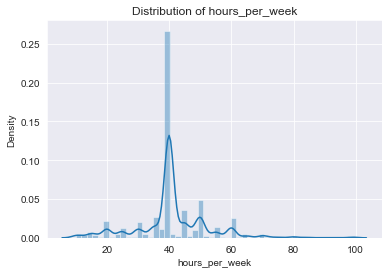

In [35]:
sns.set_style('darkgrid')
plt.figure(figsize = (5,5))

for i in salary_num.columns:
    sns.distplot(salary_num[i])
    
    plt.title(f"Distribution of {i}")
    plt.show()

> 10.  Make a general conclusion about your findings. Basically, you need to
answer the following question based on the charts and descriptive measures that you’ve
calculated: What are the main characteristics of higher income earners?

From the charts that we could create and distribution tables we can conclude that
higher income people from the dataset are older than lower income people
They are usually male, white by their race, mainly around 40 years old, and works generally 40 hours per week or more.


> 11. Download from Yahoo Finance the data for the five stocks that you wish to
invest in for [2008-01-01, 2021-01-01] period. From pandas_datareader.data use
DataReader() function.

In [36]:
yahoo = data.DataReader(name = ["DIS", "AMZN", "MSFT", "NTFIX", "TEAM"], data_source = "yahoo",
                         start = "2008-01-01", end = "2021-01-01")

In [37]:
yahoo.head()

Attributes  Adj Close                                           Close  \
Symbols           DIS       AMZN       MSFT     NTFIX TEAM        DIS   
Date                                                                    
2008-01-02  27.012505  96.250000  26.195889  7.240466  NaN  31.840000   
2008-01-03  26.953121  95.209999  26.307467  7.233825  NaN  31.770000   
2008-01-04  26.410151  88.790001  25.571117  7.260374  NaN  31.129999   
2008-01-07  26.435602  88.820000  25.742189  7.267009  NaN  31.160000   
2008-01-08  25.909611  87.879997  24.879400  7.273646  NaN  30.540001   

Attributes                                    ...       Open             \
Symbols          AMZN       MSFT  NTFIX TEAM  ...        DIS       AMZN   
Date                                          ...                         
2008-01-02  96.250000  35.220001  10.91  NaN  ...  32.320000  95.349998   
2008-01-03  95.209999  35.369999  10.90  NaN  ...  31.879999  96.059998   
2008-01-04  88.790001  34.380001  10.94  NaN  ...  31.000000  93.260002   
2008-01-07  88.820000  34.610001  10.95  NaN  ...  31.379999  88.620003   
2008-01-08  87.879997  33.450001  10.96  NaN  ...  31.250000  87.550003   

Attributes                             Volume                                \
Symbols          MSFT  NTFIX TEAM         DIS        AMZN        MSFT NTFIX   
Date                                                                          
2008-01-02  35.790001  10.91  NaN   9269900.0  13858700.0  63004200.0   0.0   
2008-01-03  35.220001  10.90  NaN   9681100.0   9122500.0  49599600.0   0.0   
2008-01-04  35.189999  10.94  NaN   9550700.0  10270000.0  72090800.0   0.0   
2008-01-07  34.549999  10.95  NaN  10742900.0   9981600.0  80164300.0   0.0   
2008-01-08  34.709999  10.96  NaN  13014300.0  12283300.0  79148300.0   0.0   

Attributes       
Symbols    TEAM  
Date             
2008-01-02  NaN  
2008-01-03  NaN  
2008-01-04  NaN  
2008-01-07  NaN  
2008-01-08  NaN  

[5 rows x 30 columns]

> 12. Use plotly.offline to create an interactive chart that will show how the Open
prices of the stocks (imported above) have changed over time. Only one chart should be
created

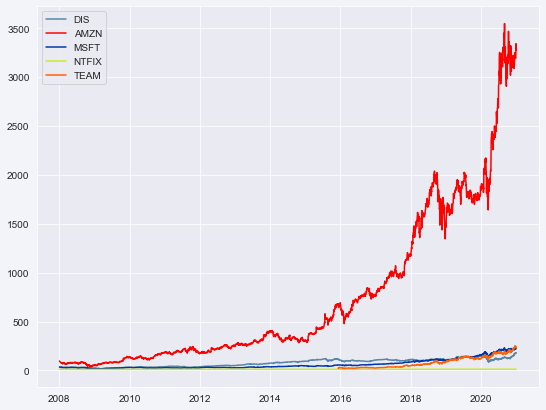

In [48]:
plt.figure(figsize=(9,7),facecolor="#f2f4f9")
plt.plot(yahoo.index, yahoo.Open.DIS, color="#5886a5", label='DIS')
plt.plot(yahoo.index, yahoo.Open.AMZN, color="#ff0101", label='AMZN')
plt.plot(yahoo.index, yahoo.Open.MSFT, color="#0037ae", label='MSFT')
plt.plot(yahoo.index, yahoo.Open.NTFIX, color="#cbe927", label='NTFIX')
plt.plot(yahoo.index, yahoo.Open.TEAM, color="#ff6103", label='TEAM')

plt.legend()

plt.show()
#Here we can see that out of the picked 5 companies Amazon was the one which rocketted up between 2008 and 2021 by its opening prices.
#The rest had some advance, but not as much as Amazon.

> 13.  By using for loop create an interactive histogram for
‘age’, ‘hours per week’ and ‘fnlwgt’ variables. What is your conclusion about distribution
of those variables?

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



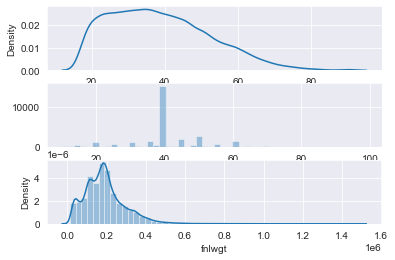

In [39]:
plt.subplot(3,1,1)
sns.distplot(salary.age, hist=False)

plt.subplot(3,1,2)
sns.distplot(salary["hours_per_week"], hist=True, kde=False)

plt.subplot(3,1,3)
sns.distplot(salary.fnlwgt)

plt.show()

In [40]:
premium = salary[["age", "hours_per_week", "fnlwgt"]]


In [41]:
premium.head()

,age,hours_per_week,fnlwgt
0,90,40.0,77053
1,82,18.0,132870
2,66,40.0,186061
3,54,40.0,140359
4,41,40.0,264663


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



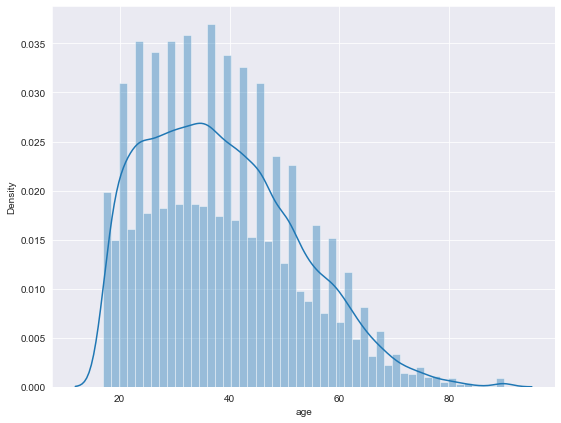

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



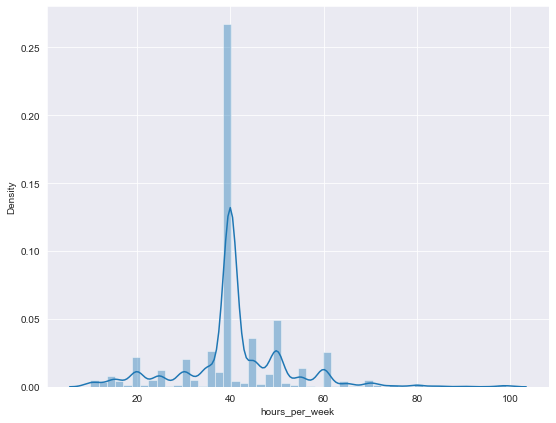

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



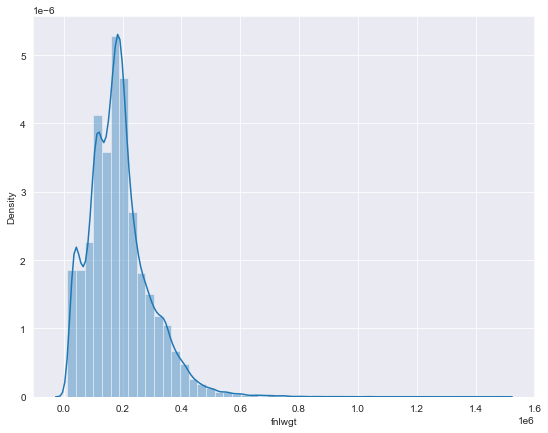

In [42]:
for i in premium.columns:
    plt.figure(figsize=(9,7))

#     plt.subplot(3,1,1)
    sns.distplot(premium[i])

    plt.show()

    

In [ ]:
print("hello")